## Create first graph

In [1]:
import tensorflow as tf

x = tf.Variable(3, name="x")
y = tf.Variable(4, name="y")
f = x * x * y + y + 2
print(f)


sess = tf.Session()
sess.run(x.initializer)
sess.run(y.initializer)
result = sess.run(f)
print(result)
sess.close()

Tensor("add_1:0", shape=(), dtype=int32)
42


In [2]:
with tf.Session() as sess:
    x.initializer.run()
    y.initializer.run()
    result = f.eval()
print(result)

42


In [3]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    init.run()
    result = f.eval()
print(result)

42


## Managing Graphs

In [4]:
x1 = tf.Variable(1)
x1.graph is tf.get_default_graph()
print(x1.name)


Variable:0


In [5]:
graph = tf.Graph()
with graph.as_default():
    x2 = tf.Variable(2)
x2.graph is graph   # True
x2.graph is tf.get_default_graph()  # False
tf.reset_default_graph()

## Linear Regression with TF

In [31]:
import numpy as np
from sklearn.datasets import  fetch_california_housing
housing = fetch_california_housing()
m, n = housing.data.shape
housing_data_plus_bias = np.c_[np.ones((m,1)), housing.data]
X = tf.constant(housing_data_plus_bias, dtype=tf.float32, name="X")
y = tf.constant(housing.target.reshape(-1,1), dtype=tf.float32, name="y")
XT = tf.transpose(X)
theta = tf.matmul(tf.matmul(tf.matrix_inverse(tf.matmul(XT, X)), XT),y)

with tf.Session() as sess:
    theta_value = theta.eval()
print(theta_value)

[[-3.6894890e+01]
 [ 4.3661433e-01]
 [ 9.4453208e-03]
 [-1.0704148e-01]
 [ 6.4345831e-01]
 [-3.9632569e-06]
 [-3.7880042e-03]
 [-4.2093179e-01]
 [-4.3400639e-01]]


## Implementing Gradient Descent
### Autodiff feature in Tensorflow
* Tensorflow keep records of various operation performed within the context
* with provided **gradient** function calculates gradient efficiently by using these records

In [3]:
import tensorflow as tf

tf.reset_default_graph()

def relu(X):
    with tf.name_scope("relu"):
        w_shape = (int(X.shape[1]),1)
        w = tf.Variable(tf.random_normal(w_shape), name="weight")
        b = tf.Variable(0.0, name="bias")
        z = tf.add(tf.matmul(X,w), b, name="z")
        return tf.maximum(z, 0., name="relu")
    
    
n_features = 3
    
X = tf.placeholder(tf.float32, shape=(None, n_features), name="X")
relus = [relu(X) for i in range(5)]
output = tf.add_n(relus, name="output")
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    sess.run(output, feed_dict={X:[[1,2,3]]})
    file_writer = tf.summary.FileWriter('/home/tf_logs/relues', graph=tf.get_default_graph())


    

In [1]:
import tensorflow as tf


tf.reset_default_graph()

def fuck(X):
    w_shape = (int(X.shape[1]),1)
    w = tf.Variable(tf.random_normal(w_shape), name="weight")    
    b = tf.Variable(1.0, name="bias")
    Y = tf.add(tf.matmul(X,w), b, name="Y")
    return tf.maximum(Y,0., name="fuck")

n_features = 10

X = tf.placeholder(tf.float32, name="X", shape=(None, n_features))
abc = [fuck(X) in range(0,5)]
out = tf.accumulate_n(abc, name="output")

init = tf.global_variables_initializer()


with tf.Session() as sess:
    sess.run(init)
    print(sess.run(out, feed_dict={X:[range(0,10)]}))
#     saver.save(sess, '/home/tf_logs/simple.ckpt')
    file_writer = tf.summary.FileWriter('/home/tf_logs/simple', graph=tf.get_default_graph())


False


In [7]:
import tensorflow as tf

tf.reset_default_graph()

def relu(X):
    with tf.name_scope("relu"):
        tf.variable_scope("relu")
        threshold = tf.get_variable("threshold", shape=(), initializer=tf.constant_initializer(0.0))
        w_shape = (int(X.shape[1]),1)
        w = tf.Variable(tf.random_normal(w_shape), name="weight")
        b = tf.Variable(0.0, name="bias")
        z = tf.add(tf.matmul(X,w), b, name="z")
        return tf.maximum(z, threshold, name="relu")
    
    
n_features = 3
    
X = tf.placeholder(tf.float32, shape=(None, n_features), name="X")
with tf.variable_scope("relu", reuse=tf.AUTO_REUSE) as scope:
    relus = [relu(X) for i in range(5)]
output = tf.add_n(relus, name="output")
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    sess.run(output, feed_dict={X:[[1,2,3]]})
    file_writer = tf.summary.FileWriter('/home/tf_logs/relues_varable', graph=tf.get_default_graph())


    

## Exercise
1. Build LogisticRegression (mini-batch)


In [5]:
import tensorflow as tf
import numpy as np
from sklearn.datasets import make_moons

tf.reset_default_graph()

n_samples = 10000


moons = make_moons(n_samples=n_samples,noise=0.02)
moons = np.c_[moons[0], moons[1]]
print(moons)

[[ 1.90266608  0.14876292  1.        ]
 [ 0.35390759  0.93067676  0.        ]
 [ 0.6231502   0.76897647  0.        ]
 ...
 [ 1.95778533  0.18460747  1.        ]
 [-0.36451261  0.92055825  0.        ]
 [-0.16709435  0.97273829  0.        ]]


/usr/local/lib/python2.7/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


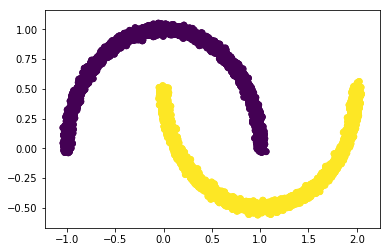

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

log_reg_sk = Pipeline((
    ("pca", PolynomialFeatures(degree=4)),
    ("reg", LogisticRegression())
))

log_reg_sk.fit(moons[:,:-1], moons[:,-1:])
pred = log_reg_sk.predict(moons[:,:-1])

plt.scatter(moons[:,0], moons[:,1], c=moons[:,2])
plt.scatter(moons[:,0], moons[:,1], c=pred)
plt.show()



In [25]:
# Logistic regression Tensorflow version

import collections
import tensorflow as tf
import numpy as np
from datetime import datetime

size = len(moons)
epoch = 50
batch_size = 10
batches = np.ceil(size / batch_size)

class RandomBatch():
    def __init__(self, data, size):
        self.data = data
        self.b_sz = size
        self.iter_cnt = 0
        self.v = range(0, len(data))
        
    def __iter__(self):
        self.iter_cnt = 0
        return self
        
    def next(self):
        if self.iter_cnt < (len(self.v) / self.b_sz) :
            self.iter_cnt = self.iter_cnt + 1
            return self.data[np.array(np.random.choice(self.v, self.b_sz, replace=False))]
        else:
            raise StopIteration

random_batch = RandomBatch(moons, batch_size)

X = tf.placeholder(name="X", shape=(None, 2), dtype=tf.float32)
Y = tf.placeholder(name="Y", shape=(None, 1), dtype=tf.float32)
w = tf.Variable(np.ones(2).reshape(2,1) ,name="weight", dtype=tf.float32)
b = tf.constant(0.0, name="bias")

def logistic_regression(x):
    return tf.sigmoid(tf.add(tf.matmul(x, w), b))

y_prob = logistic_regression(X)
opt = tf.train.GradientDescentOptimizer(learning_rate=0.01)
y_cls = tf.cast(y_prob > 0.5, dtype=tf.float32)
loss = tf.losses.log_loss(y_prob, Y)
train_op = opt.minimize(loss)


init = tf.global_variables_initializer()
# create saver
saver = tf.train.Saver()

# create file_writer 
file_writer = tf.summary.FileWriter('/home/tf_logs/epoch_{}_batch_{}'.format(epoch, batch_size), graph=tf.get_default_graph())

with tf.Session() as sess:
    sess.run(init)
    for i in range(0, epoch):
        for sample in iter(random_batch):
            sess.run(train_op, feed_dict={X: sample[:,:-1], Y: sample[:,-1:]})
        loss_str = loss.eval(feed_dict={X: moons[:,:-1], Y: moons[:,-1:]})
        summary = tf.Summary()
        summary.value.add(tag="loss", simple_value=loss_str)
        file_writer.add_summary(summary, i)
                    
    saver.save(sess, '/home/tf_logs/logistic_regression.ckpt')
    final_pred = sess.run(y_cls, feed_dict={X:moons[:,:-1]})
    
file_writer.close()

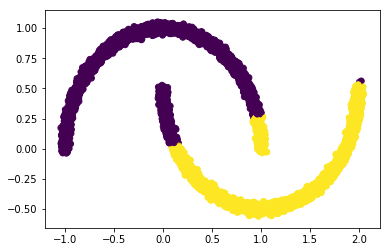

In [21]:
plt.scatter(moons[:,0], moons[:,1], c=final_pred.reshape(10000))
plt.show()

In [8]:
import tensorflow as tf

saver = tf.train.Saver()
with tf.Session() as sess:
    saver.restore(sess, '/home/tf_logs/logistic_regression.ckpt')
    


INFO:tensorflow:Restoring parameters from /home/tf_logs/logistic_regression.ckpt
